In [1]:
import pandas as pd
import os
total_df=pd.DataFrame()
total_df

for i in os.listdir('./'):
    if '.csv' in i:
        df = pd.read_csv(f'./{i}')
        linear_fix_df=df.interpolate(method='linear')
        quarter_order = {'Mar. 31': 1, 'Jun. 30': 2, 'Sep. 30': 3, 'Dec. 31': 4}
        linear_fix_df['Quarter_Order'] = linear_fix_df['Quarter'].map(quarter_order)
        df = linear_fix_df.sort_values(by=['Name', 'Year', 'Quarter_Order']).drop(columns=['Quarter_Order'])
        total_df=pd.concat([total_df,df])


/var/folders/qf/f467m8qs4rv1gpzcgr0nqbjm0000gn/T/ipykernel_2793/1827139513.py:9: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  linear_fix_df=df.interpolate(method='linear')


In [2]:
total_df

,Name,Year,Quarter,Cash and Due from Banks,Goodwill,Income Before Tax,Interest Income,Loans,Net Income,Net Interest Income,Net Loans,Non-Interest Income,Retained Earnings,Tax Expense,Total Assets,Total Liabilities,Total Stockholders Equity,Interest_Rate,Stock_Price
0,BANF,2018,Mar. 31,181.9,79.8,36.9,70.9,4984.5,29.6,63.0,4932.9,30.1,661.3,7.3,7615.6,6777.5,838.1,1.625,46.171
1,BANF,2018,Jun. 30,188.5,79.7,39.8,75.1,5007.5,30.6,64.9,4955.3,30.4,684.4,9.2,7623.0,6761.0,862.0,1.875,51.681
2,BANF,2018,Sep. 30,185.0,79.7,41.9,77.4,4947.5,32.9,65.7,4895.7,32.8,707.5,9.0,7602.4,6717.6,884.8,2.125,52.520
3,BANF,2018,Dec. 31,228.4,79.7,41.2,79.8,4976.0,32.7,66.9,4924.6,31.9,722.6,8.4,7574.3,6671.5,902.8,2.375,43.934
4,BANF,2019,Mar. 31,186.0,79.7,41.0,80.9,5042.5,31.8,66.9,4989.6,32.0,744.7,9.2,7709.0,6781.1,927.9,2.375,46.193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,WABC,2023,Mar. 31,195.2,121.7,55.0,69.6,938.6,40.5,70.7,919.1,10.5,403.3,14.6,6700.5,6057.5,642.9,4.875,42.230
346,WABC,2023,Jun. 30,266.2,121.7,54.7,70.5,919.6,40.2,69.9,901.1,10.7,432.4,14.5,6582.7,5930.9,651.9,5.125,36.921
347,WABC,2023,Sep. 30,420.6,121.7,56.9,72.8,885.9,41.6,71.3,868.1,11.3,462.3,15.3,6567.3,5918.9,648.4,5.375,42.070
348,WABC,2023,Dec. 31,190.3,121.7,55.0,71.1,866.6,39.5,69.4,849.7,11.0,490.0,15.4,6364.6,5591.7,772.9,5.375,55.375


In [3]:
del total_df["Loans"]
del total_df["Net Loans"]

In [4]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
scaler = MinMaxScaler(feature_range=(0,10)) ## 각 칼럼 데이터 값을 0~3 범위로 변환
le = LabelEncoder()
total_df["Name"] = le.fit_transform(total_df["Name"])
total_df["Year"] = le.fit_transform(total_df["Year"])
total_df["Quarter"] = le.fit_transform(total_df["Quarter"])
target_minmax=total_df.iloc[:,3:]
scaler.fit(target_minmax) ## 각 칼럼 데이터마다 변환할 함수 생성
transformed_X = scaler.transform(target_minmax) ## fit에서 만들어진 함수를 실제로 데이터에 적용
after_mimax=pd.DataFrame(transformed_X, columns=[total_df.columns[3:]])
for i in list(after_mimax.columns):
    col_name=str(i).split("'")[1]
    if col_name == "Interest_Rate":
        continue
    total_df[col_name] = after_mimax[col_name]
total_df

,Name,Year,Quarter,Cash and Due from Banks,Goodwill,Income Before Tax,Interest Income,Net Income,Net Interest Income,Non-Interest Income,Retained Earnings,Tax Expense,Total Assets,Total Liabilities,Total Stockholders Equity,Interest_Rate,Stock_Price
0,0,0,2,0.507833,0.142587,0.236479,0.183687,0.152256,0.248469,0.028563,0.271260,4.281102,0.276208,0.272205,0.289786,1.625,0.249986
1,0,0,1,0.526909,0.142383,0.239480,0.197222,0.153294,0.258084,0.028855,0.281220,4.321997,0.276551,0.271359,0.300206,1.875,0.283832
2,0,0,3,0.516793,0.142383,0.241653,0.204634,0.155681,0.262132,0.031195,0.291181,4.317693,0.275598,0.269133,0.310146,2.125,0.288985
3,0,0,0,0.642234,0.142383,0.240929,0.212368,0.155473,0.268205,0.030317,0.297691,4.304778,0.274298,0.266768,0.317993,2.375,0.236245
4,0,1,2,0.519683,0.142383,0.240722,0.215913,0.154539,0.268205,0.030415,0.307221,4.321997,0.280529,0.272390,0.328936,2.375,0.250121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,13,5,2,0.546274,0.227814,0.255211,0.179498,0.163569,0.287435,0.009456,0.160013,4.438226,0.233880,0.235273,0.204686,4.875,0.225778
346,13,5,1,0.751489,0.227814,0.254900,0.182398,0.163257,0.283386,0.009651,0.172561,4.436074,0.228431,0.228779,0.208609,5.125,0.193167
347,13,5,3,1.197757,0.227814,0.257177,0.189810,0.164710,0.290471,0.010236,0.185453,4.453293,0.227719,0.228164,0.207084,5.375,0.224795
348,13,5,0,0.532112,0.227814,0.255211,0.184332,0.162531,0.280856,0.009943,0.197397,4.455446,0.218343,0.211380,0.261361,5.375,0.306522


In [5]:
total_df.to_csv(f'./after_preprocessing_.csv', index=False)

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Conv1D, Flatten

# 데이터 로드
file_path = './after_preprocessing_.csv'
data = pd.read_csv(file_path)

# 데이터 확인
print(data.head())
print(data.info())

# feature와 target 분리 (target_column을 실제 타겟 열 이름으로 변경)
X = data.drop(columns=['Stock_Price'])
y = data['Stock_Price']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 표준화 (Standard Scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 선형 회귀 모델 구축 및 학습
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# 예측
y_pred_lr = lr_model.predict(X_test_scaled)

# 성능 평가
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f'Linear Regression MSE: {mse_lr}')

# LSTM 모델 입력 형태로 변환 (samples, timesteps, features)
X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# LSTM 모델 구축
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(1, X_train_scaled.shape[1])))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

# 학습
lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, verbose=1)

# 예측
y_pred_lstm = lstm_model.predict(X_test_lstm)

# 성능 평가
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
print(f'LSTM MSE: {mse_lstm}')

# 1D CNN 모델 입력 형태로 변환 (samples, timesteps, features)
X_train_cnn = np.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_cnn = np.reshape(X_test_scaled, (X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# 1D CNN 모델 구축
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
cnn_model.add(Flatten())
cnn_model.add(Dense(1))
cnn_model.compile(optimizer='adam', loss='mse')

# 학습
cnn_model.fit(X_train_cnn, y_train, epochs=50, batch_size=32, verbose=1)

# 예측
y_pred_cnn = cnn_model.predict(X_test_cnn)

# 성능 평가
mse_cnn = mean_squared_error(y_test, y_pred_cnn)
print(f'1D CNN MSE: {mse_cnn}')


   Name  Year  Quarter  Cash and Due from Banks  Goodwill  Income Before Tax  \
0     0     0        2                 0.507833  0.142587           0.236479   
1     0     0        1                 0.526909  0.142383           0.239480   
2     0     0        3                 0.516793  0.142383           0.241653   
3     0     0        0                 0.642234  0.142383           0.240929   
4     0     1        2                 0.519683  0.142383           0.240722   

   Interest Income  Net Income  Net Interest Income  Non-Interest Income  \
0         0.183687    0.152256             0.248469             0.028563   
1         0.197222    0.153294             0.258084             0.028855   
2         0.204634    0.155681             0.262132             0.031195   
3         0.212368    0.155473             0.268205             0.030317   
4         0.215913    0.154539             0.268205             0.030415   

   Retained Earnings  Tax Expense  Total Assets  Total Liabili

/Users/seodong-og/anaconda3/envs/week4/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.3941  
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - loss: 1.2969
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - loss: 1.6482
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - loss: 1.6843
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - loss: 1.5878
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - loss: 1.8619
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - loss: 1.5472
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - loss: 0.9391
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - loss: 0.8472
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - loss: 0.6985
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - loss: 0.3731
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - loss: 0.6177
Epoch 13/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step - loss: 0.5090
Epoch 14/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - loss: 0.8046
Epoch 15/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - loss: 0.4487
Epoch 16/50
9/9 ━━━━━━━━━━━━━━

/Users/seodong-og/anaconda3/envs/week4/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 1.7848
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - loss: 1.0695
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - loss: 0.9297
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - loss: 1.2629
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - loss: 0.8936
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - loss: 0.9059
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - loss: 1.1412
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - loss: 0.7333
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - loss: 0.6929
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - loss: 0.6130
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - loss: 0.6791
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - loss: 0.6680
Epoch 13/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - loss: 0.6015
Epoch 14/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - loss: 0.5639
Epoch 15/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - loss: 0.4274
Epoch 16/50
9/9 ━━━━━━━━━━━━━━

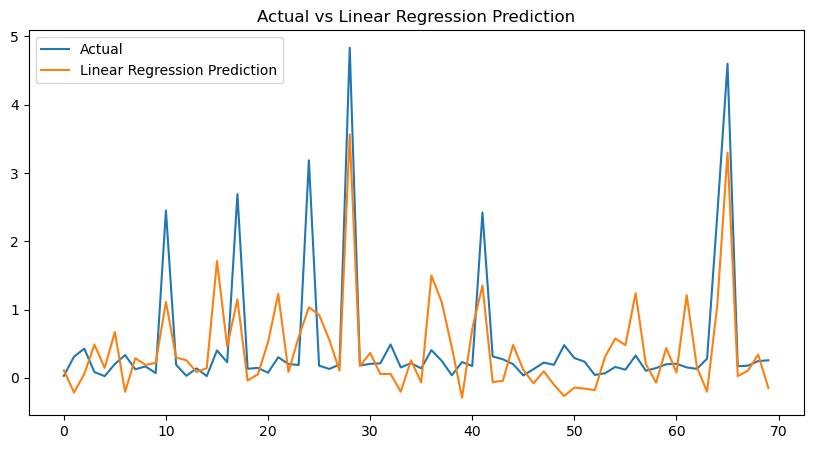

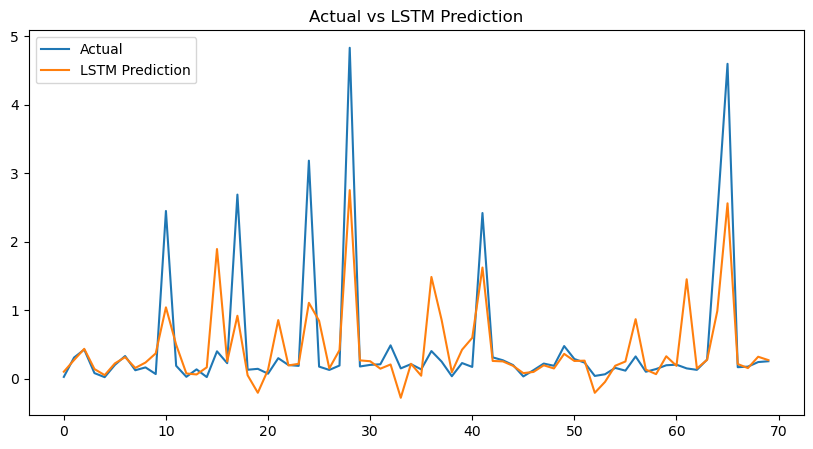

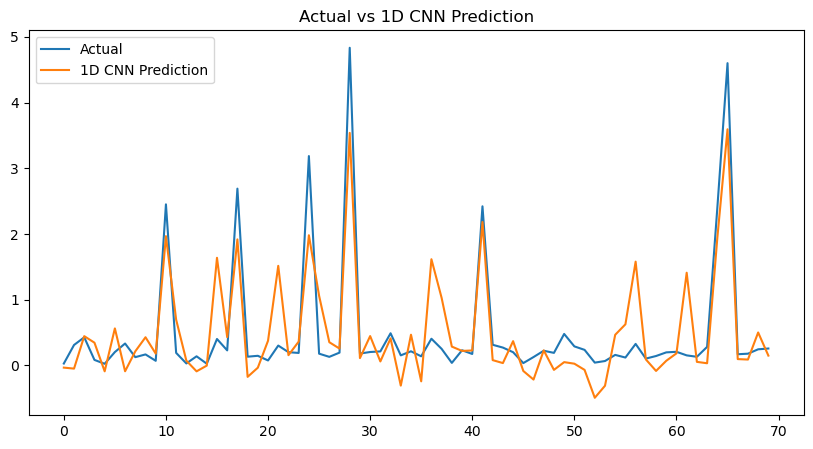

In [7]:
import matplotlib.pyplot as plt

# 실제 값과 선형 회귀 예측 값 비교
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_lr, label='Linear Regression Prediction')
plt.legend()
plt.title('Actual vs Linear Regression Prediction')
plt.show()

# 실제 값과 LSTM 예측 값 비교
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_lstm, label='LSTM Prediction')
plt.legend()
plt.title('Actual vs LSTM Prediction')
plt.show()

# 실제 값과 1D CNN 예측 값 비교
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_cnn, label='1D CNN Prediction')
plt.legend()
plt.title('Actual vs 1D CNN Prediction')
plt.show()


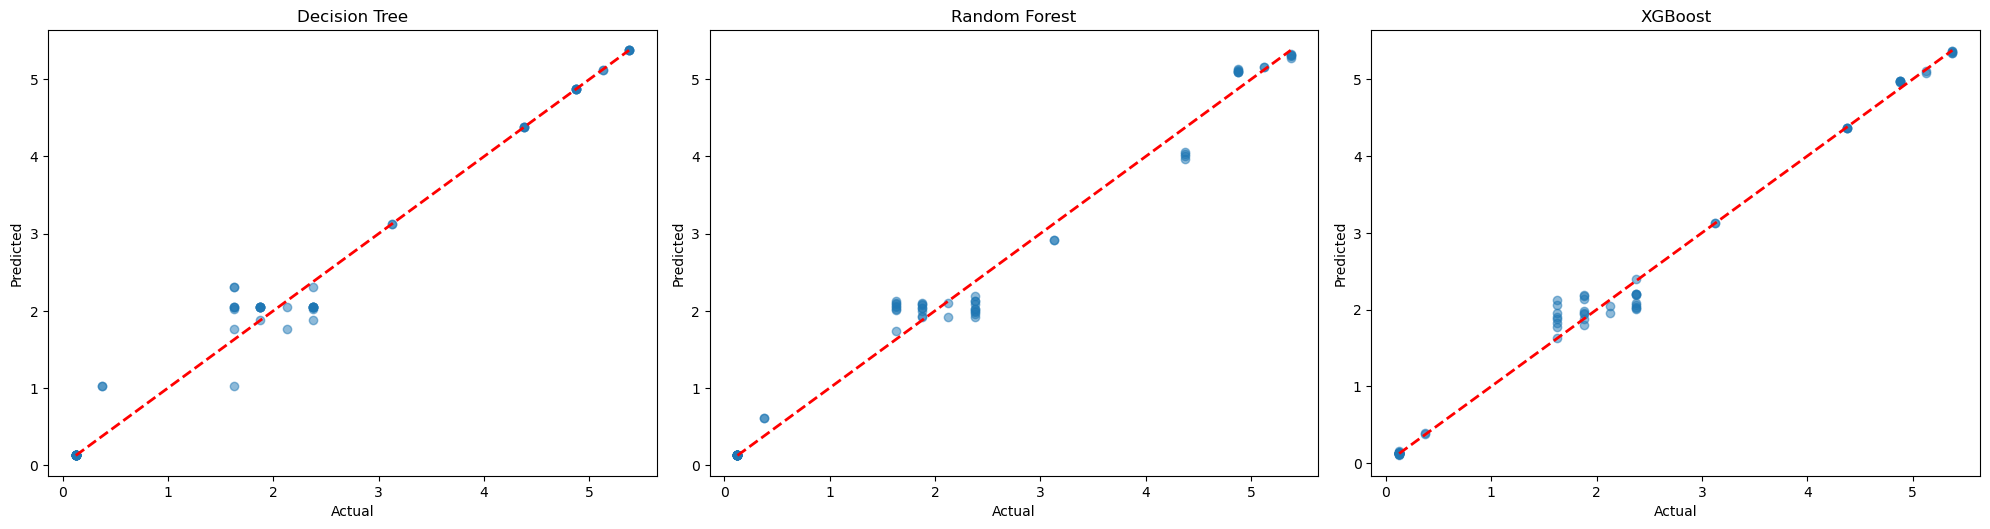

Decision Tree - MSE Train: 0.0564, MSE Test: 0.0620, RMSE Train: 0.2375, RMSE Test: 0.2489, R2 Train: 0.9847, R2 Test: 0.9813
Random Forest - MSE Train: 0.0207, MSE Test: 0.0555, RMSE Train: 0.1438, RMSE Test: 0.2356, R2 Train: 0.9944, R2 Test: 0.9832
XGBoost - MSE Train: 0.0003, MSE Test: 0.0258, RMSE Train: 0.0181, RMSE Test: 0.1605, R2 Train: 0.9999, R2 Test: 0.9922


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the CSV file
file_path = './after_preprocessing_.csv'
data = pd.read_csv(file_path)

# Feature matrix X and target vector y
X = data.drop(columns=['Interest_Rate'])
y = data['Interest_Rate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Function to evaluate the model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    return y_train_pred, y_test_pred, mse_train, mse_test, rmse_train, rmse_test, r2_train, r2_test

# Decision Tree with hyperparameter tuning
dt_regressor = DecisionTreeRegressor(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=0)
y_train_pred_dt, y_test_pred_dt, mse_train_dt, mse_test_dt, rmse_train_dt, rmse_test_dt, r2_train_dt, r2_test_dt = evaluate_model(dt_regressor, X_train, X_test, y_train, y_test)

# Random Forest with hyperparameter tuning
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=0)
y_train_pred_rf, y_test_pred_rf, mse_train_rf, mse_test_rf, rmse_train_rf, rmse_test_rf, r2_train_rf, r2_test_rf = evaluate_model(rf_regressor, X_train, X_test, y_train, y_test)

# XGBoost with hyperparameter tuning
xgb_regressor = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=0)
y_train_pred_xgb, y_test_pred_xgb, mse_train_xgb, mse_test_xgb, rmse_train_xgb, rmse_test_xgb, r2_train_xgb, r2_test_xgb = evaluate_model(xgb_regressor, X_train, X_test, y_train, y_test)

# Plotting
plt.figure(figsize=(20, 10))

# Decision Tree Plot
plt.subplot(2, 3, 1)
plt.scatter(y_test, y_test_pred_dt, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree')

# Random Forest Plot
plt.subplot(2, 3, 2)
plt.scatter(y_test, y_test_pred_rf, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest')

# XGBoost Plot
plt.subplot(2, 3, 3)
plt.scatter(y_test, y_test_pred_xgb, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('XGBoost')

# # Residual plots
# plt.subplot(2, 3, 4)
# sns.residplot(x=y_test, y=y_test_pred_dt, lowess=True, line_kws={'color': 'red', 'lw': 1})
# plt.xlabel('Actual')
# plt.ylabel('Residuals')
# plt.title('Decision Tree Residuals')

# plt.subplot(2, 3, 5)
# sns.residplot(x=y_test, y=y_test_pred_rf, lowess=True, line_kws={'color': 'red', 'lw': 1})
# plt.xlabel('Actual')
# plt.ylabel('Residuals')
# plt.title('Random Forest Residuals')

# plt.subplot(2, 3, 6)
# sns.residplot(x=y_test, y=y_test_pred_xgb, lowess=True, line_kws={'color': 'red', 'lw': 1})
# plt.xlabel('Actual')
# plt.ylabel('Residuals')
# plt.title('XGBoost Residuals')

plt.tight_layout()
plt.show()

# Print the results
print("Decision Tree - MSE Train: {:.4f}, MSE Test: {:.4f}, RMSE Train: {:.4f}, RMSE Test: {:.4f}, R2 Train: {:.4f}, R2 Test: {:.4f}".format(mse_train_dt, mse_test_dt, rmse_train_dt, rmse_test_dt, r2_train_dt, r2_test_dt))
print("Random Forest - MSE Train: {:.4f}, MSE Test: {:.4f}, RMSE Train: {:.4f}, RMSE Test: {:.4f}, R2 Train: {:.4f}, R2 Test: {:.4f}".format(mse_train_rf, mse_test_rf, rmse_train_rf, rmse_test_rf, r2_train_rf, r2_test_rf))
print("XGBoost - MSE Train: {:.4f}, MSE Test: {:.4f}, RMSE Train: {:.4f}, RMSE Test: {:.4f}, R2 Train: {:.4f}, R2 Test: {:.4f}".format(mse_train_xgb, mse_test_xgb, rmse_train_xgb, rmse_test_xgb, r2_train_xgb, r2_test_xgb))


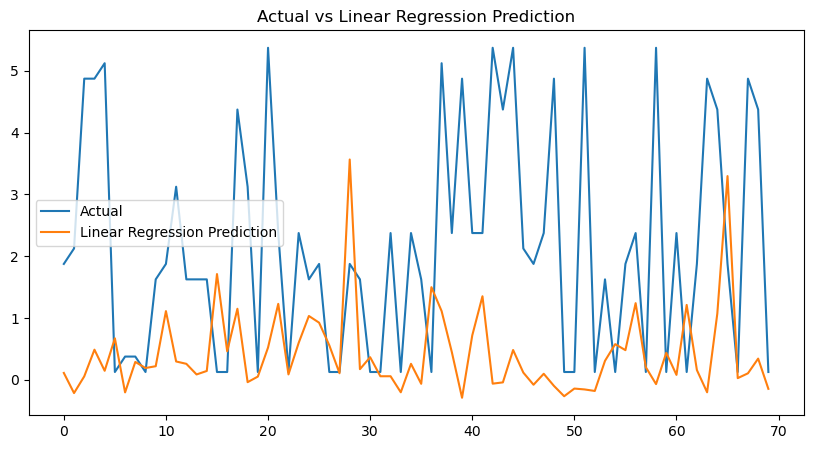

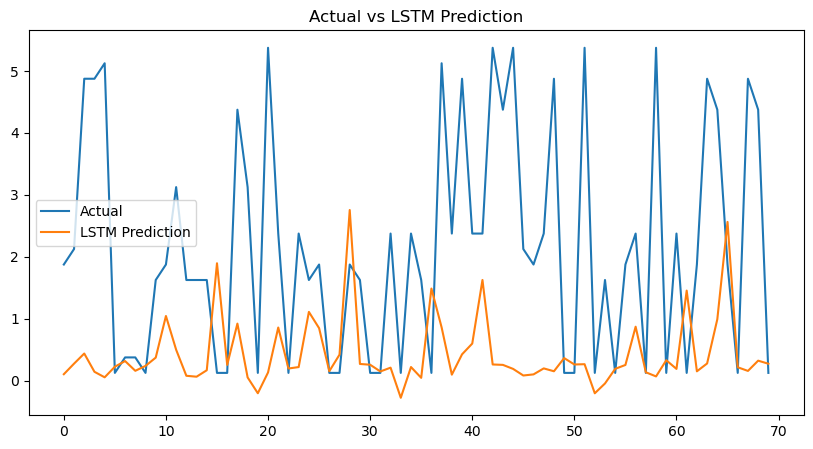

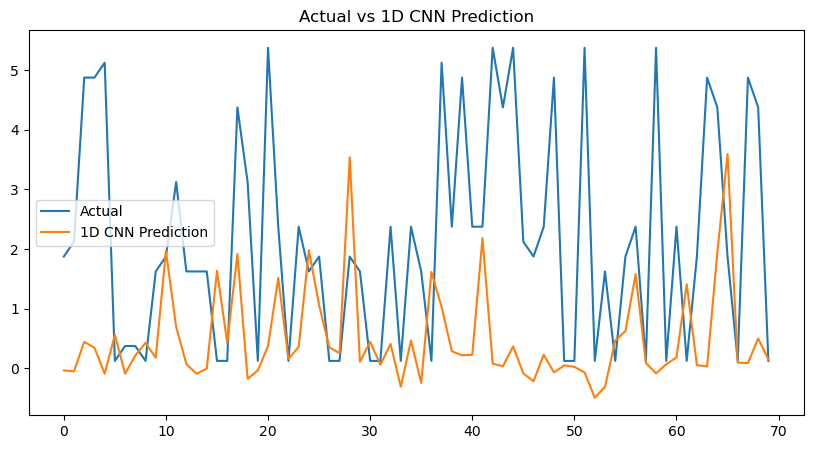

In [23]:
import matplotlib.pyplot as plt

# 실제 값과 선형 회귀 예측 값 비교
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_lr, label='Linear Regression Prediction')
plt.legend()
plt.title('Actual vs Linear Regression Prediction')
plt.show()

# 실제 값과 LSTM 예측 값 비교
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_lstm, label='LSTM Prediction')
plt.legend()
plt.title('Actual vs LSTM Prediction')
plt.show()

# 실제 값과 1D CNN 예측 값 비교
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_cnn, label='1D CNN Prediction')
plt.legend()
plt.title('Actual vs 1D CNN Prediction')
plt.show()
